In [1]:
import numpy as np
import statsmodels.api as st
from statsmodels.formula.api import glm
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [6]:
titanic = pd.read_csv('titanic.csv')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Ćwiczenie 1: Analiza przeżycia w zależności od płci (Rodzina Binomial)

Zadanie polega na przeanalizowaniu, jak płeć wpływa na szanse przeżycia.

Podpowiedź:
Regresja logistyczna (GLM z rodziną Binomial) - sprawdź kiedy się używa, sprawdź też funkcje logit i jej zastosowanie.

Zadanie:
1. Utwórz model GLM dla zmiennej `Survived` w funkcji `Sex`.
2. Interpretuje wyniki, zwracając uwagę na współczynniki i ich znaczenie.
3. Przedstaw wyniki na wykresie (np. wykres słupkowy pokazujący odsetek przeżyć wśród kobiet i mężczyzn).


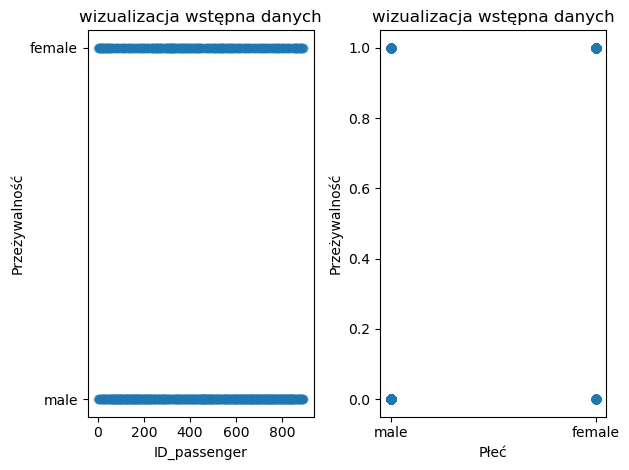

In [13]:
#General Linear Model 
#GLM ^
fig,(ax1,ax2) = plt.subplots(1,2)
ax1.scatter(titanic['PassengerId'],titanic['Sex'],alpha = 0.4)
ax1.set_title('wizualizacja wstępna danych')
ax1.set_xlabel('ID_passenger')
ax1.set_ylabel('Przeżywalność')
ax2.scatter(titanic['Sex'],titanic['Survived'],alpha = 0.4)
ax2.set_title('wizualizacja wstępna danych')
ax2.set_xlabel('Płeć')
ax2.set_ylabel('Przeżywalność')
plt.tight_layout()
plt.show()

In [17]:
titanic['Sex_binary'] = titanic['Sex'].map({'male': 0, 'female': 1})
model = glm(formula="Survived ~ Sex_binary", data = titanic, family = st.families.Binomial())
results = model.fit()
# Wyświetlenie podsumowania
print(results.summary())
print('Pvalues:')
print(results.pvalues)

                 Generalized Linear Model Regression Results                  
Dep. Variable:               Survived   No. Observations:                  891
Model:                            GLM   Df Residuals:                      889
Model Family:                Binomial   Df Model:                            1
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -458.90
Date:                Sat, 14 Dec 2024   Deviance:                       917.80
Time:                        23:07:15   Pearson chi2:                     891.
No. Iterations:                     4   Pseudo R-squ. (CS):             0.2605
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.4571      0.106    -13.701      0.0

C:\Users\piotr\AppData\Local\Temp\ipykernel_20880\726004792.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Sex', y='Survived', data=survival_by_sex, palette='viridis', ax=ax)


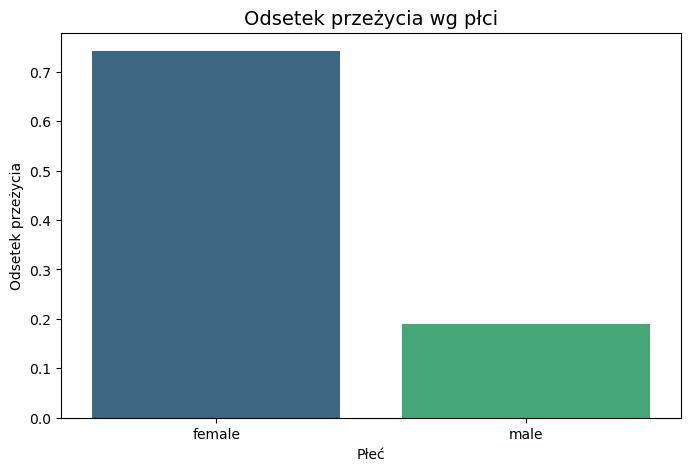

In [23]:
# Grupa wg płci i odsetek przeżycia
survival_by_sex = titanic.groupby('Sex')['Survived'].mean().reset_index()

# Wykres
fig, ax = plt.subplots(figsize=(8, 5))
sns.barplot(x='Sex', y='Survived', data=survival_by_sex, palette='viridis', ax=ax)

ax.set_title("Odsetek przeżycia wg płci", fontsize=14)
ax.set_ylabel("Odsetek przeżycia")
ax.set_xlabel("Płeć")
plt.show()

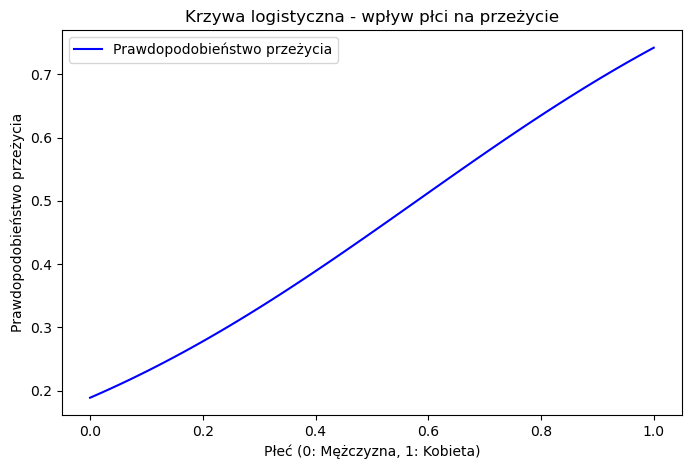

In [21]:
x = np.linspace(0, 1, 100)  
y_pred = results.predict(pd.DataFrame({"Sex_binary": x}))

# Wykres
fig, ax = plt.subplots(figsize=(8, 5))
ax.plot(x, y_pred, label='Prawdopodobieństwo przeżycia', color='blue')
ax.set_title("Krzywa logistyczna - wpływ płci na przeżycie")
ax.set_xlabel("Płeć (0: Mężczyzna, 1: Kobieta)")
ax.set_ylabel("Prawdopodobieństwo przeżycia")
plt.legend()
plt.show()

# Ćwiczenie 2: Wpływ wieku na szanse przeżycia (Rodzina Gaussian)

Zadanie polega na zbadaniu wpływu wieku na szanse przeżycia pasażerów Titanica.

Podpowiedź:
Sprawdź jak działa GLM z rodziną Gaussian (normalna) i kiedy jest stosowana.

Zadanie:

1. Utwórz model GLM dla zmiennej `Survived` w funkcji `Age`.
2. Oceń, czy wiek ma statystycznie istotny wpływ na przeżycie.
3. Wizualizuj wyniki (np. wykres punktowy z linią regresji).


In [31]:
y_pogladowe = titanic.groupby('Age').sum()
print(y_pogladowe.head())

      PassengerId  Survived  Pclass  \
Age                                   
0.42          804         1       3   
0.67          756         1       2   
0.75         1115         2       6   
0.83          911         2       4   
0.92          306         1       1   

                                                   Name           Sex  SibSp  \
Age                                                                            
0.42                    Thomas, Master. Assad Alexander          male      0   
0.67                          Hamalainen, Master. Viljo          male      1   
0.75  Baclini, Miss. Helene BarbaraBaclini, Miss. Eu...  femalefemale      4   
0.83  Caldwell, Master. Alden GatesRichards, Master....      malemale      1   
0.92                     Allison, Master. Hudson Trevor          male      1   

      Parch       Ticket      Fare    Cabin Embarked  Sex_binary  
Age                                                               
0.42      1         2625    8.5

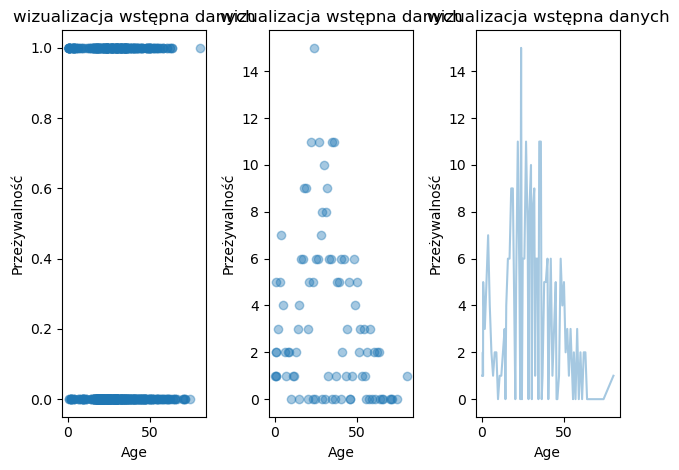

In [35]:
fig,(ax1,ax2,ax3) = plt.subplots(1,3)
ax1.scatter(titanic['Age'],titanic['Survived'],alpha = 0.4)
ax1.set_title('wizualizacja wstępna danych')
ax1.set_xlabel('Age')
ax1.set_ylabel('Przeżywalność')
ax2.scatter(y_pogladowe.index,y_pogladowe['Survived'],alpha = 0.4)
ax2.set_title('wizualizacja wstępna danych')
ax2.set_xlabel('Age')
ax2.set_ylabel('Przeżywalność')
ax3.plot(y_pogladowe.index,y_pogladowe['Survived'],alpha = 0.4)
ax3.set_title('wizualizacja wstępna danych')
ax3.set_xlabel('Age')
ax3.set_ylabel('Przeżywalność')
plt.tight_layout()
plt.show()

In [39]:
y_pogladowe = y_pogladowe.reset_index()
y_pogladowe.head()

,index,Age,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_binary
0,0,0.42,804,1,3,"Thomas, Master. Assad Alexander",male,0,1,2625,8.5167,0,C,0
1,1,0.67,756,1,2,"Hamalainen, Master. Viljo",male,1,1,250649,14.5000,0,S,0
2,2,0.75,1115,2,6,"Baclini, Miss. Helene BarbaraBaclini, Miss. Eu...",femalefemale,4,2,26662666,38.5166,0,CC,2
3,3,0.83,911,2,4,"Caldwell, Master. Alden GatesRichards, Master....",malemale,1,3,24873829106,47.7500,0,SS,0
4,4,0.92,306,1,1,"Allison, Master. Hudson Trevor",male,1,2,113781,151.5500,C22 C26,S,0


In [45]:
# Dopasowanie modelu: przewidywanie Survived na podstawie Age
model_gauss = glm(formula="Survived ~ Age", data=y_pogladowe, family=st.families.Gaussian())
results_gauss = model_gauss.fit()

print(results_gauss.summary())
print('Pvalues:')
print(results_gauss.pvalues)


                 Generalized Linear Model Regression Results                  
Dep. Variable:               Survived   No. Observations:                   88
Model:                            GLM   Df Residuals:                       86
Model Family:                Gaussian   Df Model:                            1
Link Function:               Identity   Scale:                          11.111
Method:                          IRLS   Log-Likelihood:                -229.80
Date:                Sun, 15 Dec 2024   Deviance:                       955.52
Time:                        00:30:44   Pearson chi2:                     956.
No. Iterations:                     3   Pseudo R-squ. (CS):            0.06246
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.6543      0.673      6.916      0.0

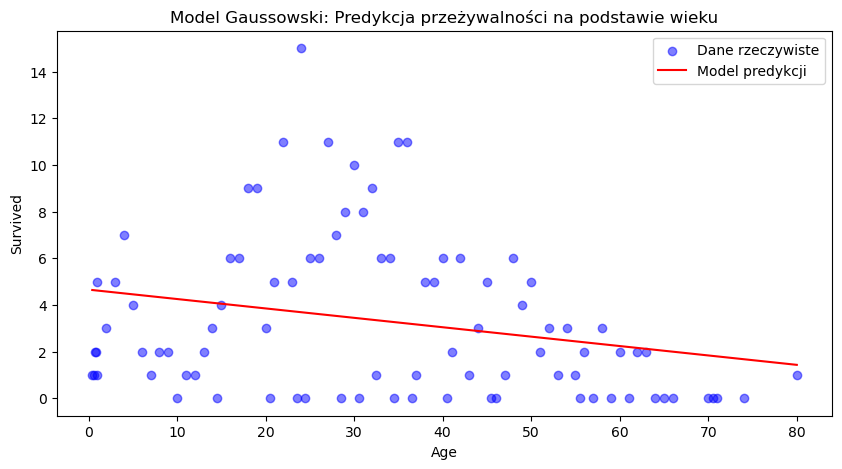

In [46]:
x_gauss = np.linspace(y_pogladowe['Age'].min(), y_pogladowe['Age'].max(), 100)

data_pred_gauss = pd.DataFrame({"Age": x_gauss})

y_pred_gauss = results_gauss.predict(data_pred_gauss)

# Wizualizacja wyników
fig, ax = plt.subplots(figsize=(10, 5))
ax.scatter(y_pogladowe['Age'], y_pogladowe['Survived'], color='blue', alpha=0.5, label="Dane rzeczywiste")
ax.plot(x_gauss, y_pred_gauss, color='red', label="Model predykcji")
ax.set_xlabel("Age")
ax.set_ylabel("Survived")
ax.set_title("Model Gaussowski: Predykcja przeżywalności na podstawie wieku")
ax.legend()
plt.show()


# Ćwiczenie 3: Analiza liczby rodzeństwa i dzieci (Rodzina Poisson)

Zbadanie wpływu liczby rodzeństwa i dzieci na przeżycie pasażerów.

Podpowiedź:
Sprawdź co to jest GLM z rodziną Poisson i jakie założenia spełnia.

Zadanie:
1. Utwórz model GLM dla zmiennej `Survived` w funkcji `sibsp` (liczba rodzeństwa/dzieci).
2. Oceń, czy liczba rodzeństwa/dzieci ma wpływ na szanse przeżycia.
3. Wizualizuj wyniki na wykresie (np. histogram).


In [53]:
y_3 = titanic.groupby('SibSp').sum()
y_3 = y_3.reset_index()
y_3 = y_3.drop(['Sex','Age','Name','Ticket','Fare','Cabin','Embarked'],axis = 1)
y_3.head()

,SibSp,PassengerId,Survived,Pclass,Parch,Sex_binary
0,0,276865,210,1430,113,174
1,1,91903,112,430,137,106
2,2,11548,13,66,18,13
3,3,5145,4,41,21,11
4,4,6869,3,54,27,6


Text(0, 0.5, 'Przeżywalność')

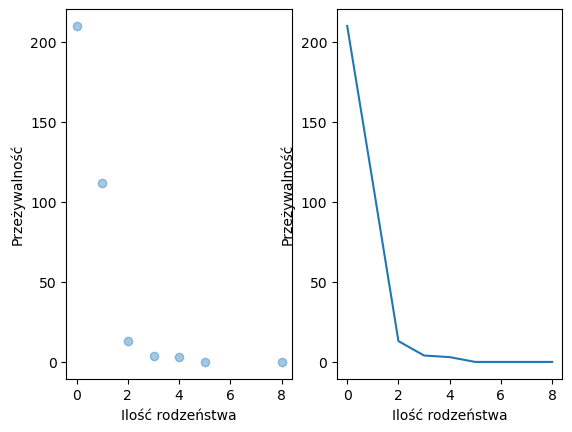

In [54]:
fig,(ax1,ax2) = plt.subplots(1,2)
ax1.scatter(y_3['SibSp'],y_3['Survived'],alpha = 0.4)
ax1.set_xlabel('Ilość rodzeństwa')
ax1.set_ylabel('Przeżywalność')
ax2.plot(y_3['SibSp'],y_3['Survived'])
ax2.set_xlabel('Ilość rodzeństwa')
ax2.set_ylabel('Przeżywalność')

In [57]:
model_poisson = glm(formula="Survived ~ SibSp", data=y_3, family=st.families.Poisson())
results_poisson = model_poisson.fit()

print(results_poisson.summary())
print('Pvalues:')
print(results_poisson.pvalues)

                 Generalized Linear Model Regression Results                  
Dep. Variable:               Survived   No. Observations:                    7
Model:                            GLM   Df Residuals:                        5
Model Family:                 Poisson   Df Model:                            1
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -26.375
Date:                Sun, 15 Dec 2024   Deviance:                       28.334
Time:                        00:40:03   Pearson chi2:                     28.3
No. Iterations:                     7   Pseudo R-squ. (CS):              1.000
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.4438      0.062     87.186      0.0

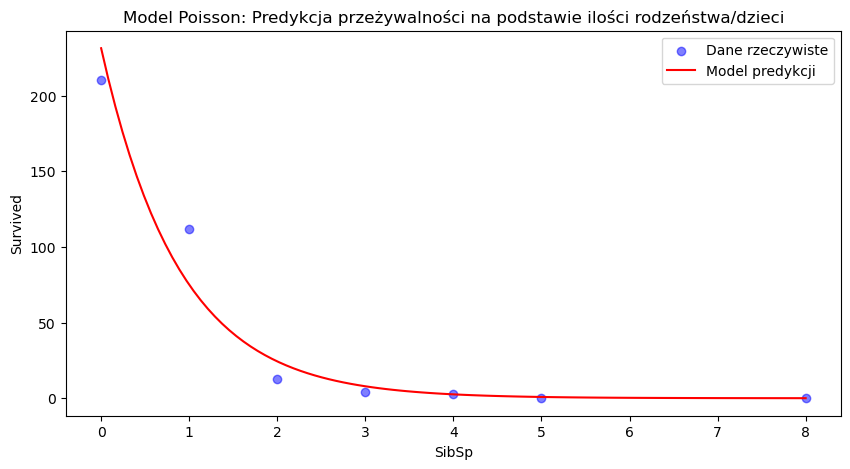

In [58]:
x_poisson = np.linspace(y_3['SibSp'].min(),y_3['SibSp'].max(), 100)

data_pred_poisson = pd.DataFrame({"SibSp": x_poisson})

y_pred_poisson = results_poisson.predict(data_pred_poisson)

# Wizualizacja wyników
fig, ax = plt.subplots(figsize=(10, 5))
ax.scatter(y_3['SibSp'], y_3['Survived'], color='blue', alpha=0.5, label="Dane rzeczywiste")
ax.plot(x_poisson, y_pred_poisson, color='red', label="Model predykcji")
ax.set_xlabel("SibSp")
ax.set_ylabel("Survived")
ax.set_title("Model Poisson: Predykcja przeżywalności na podstawie ilości rodzeństwa/dzieci")
ax.legend()
plt.show()

# Ćwiczenie 4: Model wielowymiarowy (Binomial)

Stworzenie modelu wielowymiarowego, który bierze pod uwagę płeć, wiek i klasę pasażera.

Zadanie:
1. Utwórz model GLM dla zmiennej `Survived` w funkcji `Sex`, `Age` i `Pclass`.
2. Oceń wpływ każdej zmiennej na przeżycie.
3. Przedstaw wyniki na wykresach (np. boxplot dla wieku w zależności od klasy i przeżycia).


In [61]:
nan_count = titanic['Age'].isna().sum()
print(nan_count)

177


In [62]:
titanic['Sex_binary'] = titanic['Sex'].map({'male': 0, 'female': 1})

titanic['Age'].fillna(titanic['Age'].median(), inplace=True)

C:\Users\piotr\AppData\Local\Temp\ipykernel_20880\4269049767.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic['Age'].fillna(titanic['Age'].median(), inplace=True)


In [64]:
model_multidim = glm(formula="Survived ~ Sex_binary + Age + Pclass", data=titanic, family=st.families.Binomial())
results_multidim = model_multidim.fit()
print(results_multidim.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:               Survived   No. Observations:                  891
Model:                            GLM   Df Residuals:                      887
Model Family:                Binomial   Df Model:                            3
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -402.79
Date:                Sun, 15 Dec 2024   Deviance:                       805.59
Time:                        00:58:05   Pearson chi2:                     929.
No. Iterations:                     5   Pseudo R-squ. (CS):             0.3480
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.1125      0.406      5.203      0.0

In [66]:
coefficients_multidim = results_multidim.params
# Wyciąganie wartości p
p_values_multidim = results_multidim.pvalues

# Wyświetlanie współczynników i wartości p
print("Współczynniki:")
print(coefficients_multidim)
print("\nWartości p:")
print(p_values_multidim)

Współczynniki:
Intercept     2.112460
Sex_binary    2.612279
Age          -0.033311
Pclass       -1.171719
dtype: float64

Wartości p:
Intercept     1.959840e-07
Sex_binary    1.423476e-44
Age           6.201413e-06
Pclass        9.221382e-23
dtype: float64


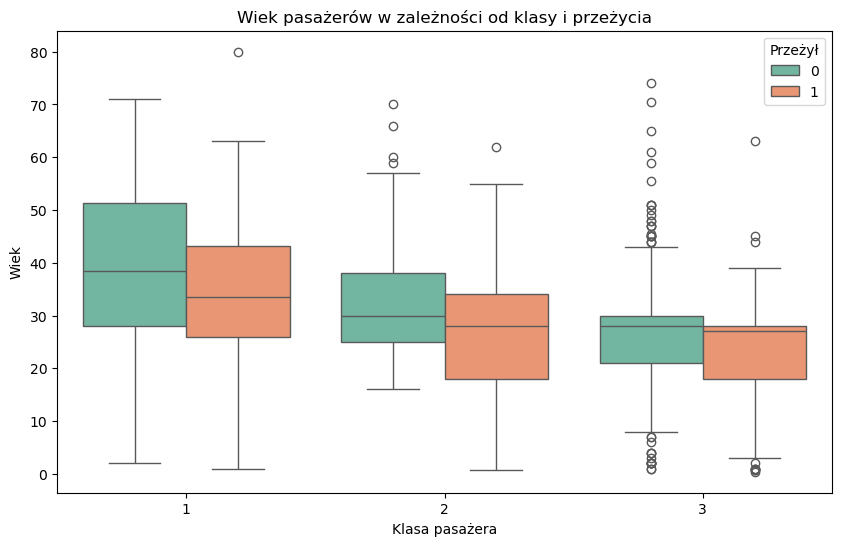

In [65]:
plt.figure(figsize=(10, 6))
sns.boxplot(x="Pclass", y="Age", hue="Survived", data=titanic, palette="Set2")
plt.title("Wiek pasażerów w zależności od klasy i przeżycia")
plt.xlabel("Klasa pasażera")
plt.ylabel("Wiek")
plt.legend(title="Przeżył", loc='upper right')
plt.show()